# 모듈 import

In [4]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
# statsmodels 설치 후 kernel restart한 뒤 아래 셀부터 실행

In [6]:
import numpy as np
import pandas as pd
import os

from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트
import matplotlib.font_manager as fm

#  한글글꼴로 변경
plt.rc('font', family='NanumMyeongjo') # For Windows

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정
plt.rcParams['figure.figsize'] = [10, 6]

In [7]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import mse, rmse, aic
from statsmodels.tsa.stattools import grangercausalitytests

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

# DataConcat

## 2012~2022 전체 데이터 합치기

### Water data

In [8]:
from glob import glob
import pandas as pd

In [9]:
water = sorted(glob('water_data/*.csv'))
water

['water_data/data_2012.csv',
 'water_data/data_2013.csv',
 'water_data/data_2014.csv',
 'water_data/data_2015.csv',
 'water_data/data_2016.csv',
 'water_data/data_2017.csv',
 'water_data/data_2018.csv',
 'water_data/data_2019.csv',
 'water_data/data_2020.csv',
 'water_data/data_2021.csv',
 'water_data/data_2022.csv']

In [10]:
df1 = pd.read_csv(water[0],index_col=0)

for i in water[1:]:
    temp = pd.read_csv(i,index_col=0)
    df1 = pd.concat([df1,temp],axis=0)
df1.shape

(276336, 14)

In [11]:
df1

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
ymdhm,,,,,,,,,,,,,,
2012-05-01 00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18
2012-05-01 00:10,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18
2012-05-01 00:20,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18
2012-05-01 00:30,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17
2012-05-01 00:40,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10,25.040,259.23,212.86,31.14,259.23,510.0,0.0,319.84,0.0,NaN,0.0,-456.41,0.0,974.40
2022-07-18 23:20,25.040,260.46,212.86,31.14,260.46,492.0,0.0,314.01,0.0,NaN,0.0,-717.30,0.0,1006.88
2022-07-18 23:30,25.040,259.37,212.86,31.14,259.37,475.0,0.0,387.55,0.0,NaN,0.0,-843.37,0.0,1039.90


### Rain data

In [12]:
rain = sorted(glob('rf_data/*.csv'))
rain

['rf_data/rf_2012.csv',
 'rf_data/rf_2013.csv',
 'rf_data/rf_2014.csv',
 'rf_data/rf_2015.csv',
 'rf_data/rf_2016.csv',
 'rf_data/rf_2017.csv',
 'rf_data/rf_2018.csv',
 'rf_data/rf_2019.csv',
 'rf_data/rf_2020.csv',
 'rf_data/rf_2021.csv',
 'rf_data/rf_2022.csv']

In [13]:
df2 = pd.read_csv(rain[0],index_col=0)

for i in rain[1:]:
    temp = pd.read_csv(i,index_col=0)
    df2 = pd.concat([df2,temp],axis=0)
df2.shape

(276336, 3)

In [14]:
df2

,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,
2012-05-01 00:00,0.0,0.0,0.0
2012-05-01 00:10,0.0,0.0,0.0
2012-05-01 00:20,0.0,0.0,0.0
2012-05-01 00:30,0.0,0.0,0.0
2012-05-01 00:40,0.0,0.0,0.0
...,...,...,...
2022-07-18 23:10,0.0,0.0,0.0
2022-07-18 23:20,0.0,0.0,0.0
2022-07-18 23:30,0.0,0.0,0.0


### Data concat

In [15]:
combine = pd.concat([df1,df2],axis=1)
combine

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,,
2012-05-01 00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:10,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:20,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:30,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
2012-05-01 00:40,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10,25.040,259.23,212.86,31.14,259.23,510.0,0.0,319.84,0.0,NaN,0.0,-456.41,0.0,974.40,0.0,0.0,0.0
2022-07-18 23:20,25.040,260.46,212.86,31.14,260.46,492.0,0.0,314.01,0.0,NaN,0.0,-717.30,0.0,1006.88,0.0,0.0,0.0
2022-07-18 23:30,25.040,259.37,212.86,31.14,259.37,475.0,0.0,387.55,0.0,NaN,0.0,-843.37,0.0,1039.90,0.0,0.0,0.0


In [16]:
df=pd.DataFrame.copy(combine)
df

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,,
2012-05-01 00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:10,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:20,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:30,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
2012-05-01 00:40,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10,25.040,259.23,212.86,31.14,259.23,510.0,0.0,319.84,0.0,NaN,0.0,-456.41,0.0,974.40,0.0,0.0,0.0
2022-07-18 23:20,25.040,260.46,212.86,31.14,260.46,492.0,0.0,314.01,0.0,NaN,0.0,-717.30,0.0,1006.88,0.0,0.0,0.0
2022-07-18 23:30,25.040,259.37,212.86,31.14,259.37,475.0,0.0,387.55,0.0,NaN,0.0,-843.37,0.0,1039.90,0.0,0.0,0.0


## 외부 data concat

### 청담대교

In [17]:
chungdam = sorted(glob('Chungdam_bridge_data/*.csv'))
chungdam

['Chungdam_bridge_data/청담대교_220601-220614.csv',
 'Chungdam_bridge_data/청담대교_220615-220628.csv',
 'Chungdam_bridge_data/청담대교_220629-220712.csv',
 'Chungdam_bridge_data/청담대교_220713-220718.csv']

In [18]:
df1 = pd.read_csv(chungdam[0])

for i in chungdam[1:]:
    temp = pd.read_csv(i)
    df1 = pd.concat([df1,temp],axis=0)
df1.shape

(6912, 4)

In [19]:
# trainset에서 가지고 있는 데이터 형태로 변경
df1.drop('수위', axis=1, inplace=True)
df1['wl_1018662']=df1['해발표고']*100
df1.drop(['유량','해발표고'], axis=1, inplace=True)
df1

,ymdhm,wl_1018662
0,2022-06-01 0:00,279.0
1,2022-06-01 0:10,281.0
2,2022-06-01 0:20,284.0
3,2022-06-01 0:30,285.0
4,2022-06-01 0:40,284.0
...,...,...
859,2022-07-18 23:10,288.0
860,2022-07-18 23:20,287.0
861,2022-07-18 23:30,299.0
862,2022-07-18 23:40,309.0


In [20]:
df1.isnull().sum()

ymdhm         0
wl_1018662    0
dtype: int64

### 잠수교

In [21]:
Jamsu = sorted(glob('Jamsu_bridge_data/*.csv'))
Jamsu

['Jamsu_bridge_data/잠수대교_220601-220614.csv',
 'Jamsu_bridge_data/잠수대교_220615-220628.csv',
 'Jamsu_bridge_data/잠수대교_220629-220712.csv',
 'Jamsu_bridge_data/잠수대교_220713-220718.csv']

In [22]:
df2 = pd.read_csv(Jamsu[0])

for i in Jamsu[1:]:
    temp = pd.read_csv(i)
    df2 = pd.concat([df2,temp],axis=0)
df2.shape

(6912, 4)

In [23]:
# trainset에서 가지고 있는 데이터 형태로 변경
df2.drop('수위', axis=1, inplace=True)
df2['wl_1018680']=df2['해발표고']*100
df2.drop(['유량','해발표고'], axis=1, inplace=True)
df2

,ymdhm,wl_1018680
0,2022-06-01 0:00,276.0
1,2022-06-01 0:10,277.0
2,2022-06-01 0:20,277.0
3,2022-06-01 0:30,277.0
4,2022-06-01 0:40,278.0
...,...,...
859,2022-07-18 23:10,295.0
860,2022-07-18 23:20,303.0
861,2022-07-18 23:30,307.0
862,2022-07-18 23:40,311.0


In [24]:
df2.isnull().sum()

ymdhm         0
wl_1018680    0
dtype: int64

### 한강대교

In [25]:
hangang = sorted(glob('Hangang_bridge_data/*.csv'))
hangang

['Hangang_bridge_data/한강대교_220601-220614.csv',
 'Hangang_bridge_data/한강대교_220615-220628.csv',
 'Hangang_bridge_data/한강대교_220629-220712.csv',
 'Hangang_bridge_data/한강대교_220713-220718.csv']

In [26]:
a = pd.read_csv(hangang[1])
a

,ymdhm,����,����.1,�ع�ǥ��
0,2022-06-15 0:00,0.83,336.96,2.90
1,2022-06-15 0:10,0.82,378.55,2.89
2,2022-06-15 0:20,0.81,453.61,2.88
3,2022-06-15 0:30,0.80,486.53,2.87
4,2022-06-15 0:40,0.79,477.46,2.86
...,...,...,...,...
2011,2022-06-28 23:10,1.25,901.36,3.32
2012,2022-06-28 23:20,1.25,905.82,3.32
2013,2022-06-28 23:30,1.24,917.98,3.31
2014,2022-06-28 23:40,1.23,947.9,3.30


In [27]:
df3 = pd.read_csv(hangang[0])
df3 = df3.iloc[:,[0,-1]]
df_temp = pd.read_csv(hangang[1])
df3 = pd.concat([df3,df_temp],axis=0)
df3.columns = ['ymdhm','해발표고',0,1]
df3.iloc[:,[0,1]]
for i in hangang[2:]:
    temp = pd.read_csv(i)
    temp = temp.iloc[:,[0,-1]]
    df3 = pd.concat([df3,temp],axis=0)
df3.shape

(6912, 4)

In [28]:
df3

,ymdhm,해발표고,0,1
0,2022-06-01 0:00,2.74,NaN,NaN
1,2022-06-01 0:10,2.74,NaN,NaN
2,2022-06-01 0:20,2.74,NaN,NaN
3,2022-06-01 0:30,2.74,NaN,NaN
4,2022-06-01 0:40,2.74,NaN,NaN
...,...,...,...,...
859,2022-07-18 23:10,2.99,NaN,NaN
860,2022-07-18 23:20,3.04,NaN,NaN
861,2022-07-18 23:30,3.09,NaN,NaN
862,2022-07-18 23:40,3.14,NaN,NaN


In [29]:
# trainset에서 가지고 있는 데이터 형태로 변경
df3.drop([0,1], axis=1, inplace=True)
df3['wl_1018683']=df3['해발표고']*100
df3.drop(['해발표고'], axis=1, inplace=True)
df3

,ymdhm,wl_1018683
0,2022-06-01 0:00,274.0
1,2022-06-01 0:10,274.0
2,2022-06-01 0:20,274.0
3,2022-06-01 0:30,274.0
4,2022-06-01 0:40,274.0
...,...,...
859,2022-07-18 23:10,299.0
860,2022-07-18 23:20,304.0
861,2022-07-18 23:30,309.0
862,2022-07-18 23:40,314.0


In [30]:
df3.isnull().sum()

ymdhm         0
wl_1018683    0
dtype: int64

### 행주대교

In [31]:
hangju = sorted(glob('Hangju_bridge_data/*.csv'))
hangju

['Hangju_bridge_data/행주대교_220601-220614.csv',
 'Hangju_bridge_data/행주대교_220615-220628.csv',
 'Hangju_bridge_data/행주대교_220629-220712.csv',
 'Hangju_bridge_data/행주대교_220713-220718.csv']

In [32]:
df4 = pd.read_csv(hangju[0])

for i in hangju[1:]:
    temp = pd.read_csv(i)
    df4 = pd.concat([df4,temp],axis=0)
df4.shape

(6912, 4)

In [33]:
df4

,ymdhm,수위,유량,해발표고
0,2022-06-01 0:00,1.89,471.08,2.69
1,2022-06-01 0:10,1.87,449.12,2.67
2,2022-06-01 0:20,1.84,417.17,2.64
3,2022-06-01 0:30,1.81,386.43,2.61
4,2022-06-01 0:40,1.79,366.60,2.59
...,...,...,...,...
859,2022-07-18 23:10,2.26,974.40,3.06
860,2022-07-18 23:20,2.28,1006.88,3.08
861,2022-07-18 23:30,2.30,1039.90,3.10
862,2022-07-18 23:40,2.32,1073.46,3.12


In [34]:
# trainset에서 가지고 있는 데이터 형태로 변경
df4.drop('수위', axis=1, inplace=True)
df4['wl_1019630']=df4['해발표고']*100
df4.drop(['유량','해발표고'], axis=1, inplace=True)
df4

,ymdhm,wl_1019630
0,2022-06-01 0:00,269.0
1,2022-06-01 0:10,267.0
2,2022-06-01 0:20,264.0
3,2022-06-01 0:30,261.0
4,2022-06-01 0:40,259.0
...,...,...
859,2022-07-18 23:10,306.0
860,2022-07-18 23:20,308.0
861,2022-07-18 23:30,310.0
862,2022-07-18 23:40,312.0


## 외부데이터들 1개의 dataframe으로 merge

In [35]:
combine = pd.merge(df1,df2,on='ymdhm')
combine

,ymdhm,wl_1018662,wl_1018680
0,2022-06-01 0:00,279.0,276.0
1,2022-06-01 0:10,281.0,277.0
2,2022-06-01 0:20,284.0,277.0
3,2022-06-01 0:30,285.0,277.0
4,2022-06-01 0:40,284.0,278.0
...,...,...,...
6907,2022-07-18 23:10,288.0,295.0
6908,2022-07-18 23:20,287.0,303.0
6909,2022-07-18 23:30,299.0,307.0
6910,2022-07-18 23:40,309.0,311.0


In [36]:
combine = pd.merge(combine,df3,on='ymdhm')
combine

,ymdhm,wl_1018662,wl_1018680,wl_1018683
0,2022-06-01 0:00,279.0,276.0,274.0
1,2022-06-01 0:10,281.0,277.0,274.0
2,2022-06-01 0:20,284.0,277.0,274.0
3,2022-06-01 0:30,285.0,277.0,274.0
4,2022-06-01 0:40,284.0,278.0,274.0
...,...,...,...,...
6907,2022-07-18 23:10,288.0,295.0,299.0
6908,2022-07-18 23:20,287.0,303.0,304.0
6909,2022-07-18 23:30,299.0,307.0,309.0
6910,2022-07-18 23:40,309.0,311.0,314.0


In [37]:
combine = pd.merge(combine,df4,on='ymdhm')
combine

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2022-06-01 0:00,279.0,276.0,274.0,269.0
1,2022-06-01 0:10,281.0,277.0,274.0,267.0
2,2022-06-01 0:20,284.0,277.0,274.0,264.0
3,2022-06-01 0:30,285.0,277.0,274.0,261.0
4,2022-06-01 0:40,284.0,278.0,274.0,259.0
...,...,...,...,...,...
6907,2022-07-18 23:10,288.0,295.0,299.0,306.0
6908,2022-07-18 23:20,287.0,303.0,304.0,308.0
6909,2022-07-18 23:30,299.0,307.0,309.0,310.0
6910,2022-07-18 23:40,309.0,311.0,314.0,312.0


## 기존의 dataset에 비어있던 test 기간 데이터 추가

In [38]:
# 기존 dataset 인덱스type을 datetime형으로 변환
df.reset_index(inplace=True)
df['ymdhm']=pd.to_datetime(df['ymdhm'])
df.set_index('ymdhm', inplace=True)
df

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,0.0,319.84,0.0,NaN,0.0,-456.41,0.0,974.40,0.0,0.0,0.0
2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,0.0,314.01,0.0,NaN,0.0,-717.30,0.0,1006.88,0.0,0.0,0.0
2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,0.0,387.55,0.0,NaN,0.0,-843.37,0.0,1039.90,0.0,0.0,0.0


In [39]:
# 추가할 test 기간 데이터 인덱스type을 datetime형으로 변환

df_test=pd.DataFrame.copy(combine)
df_test['ymdhm']=pd.to_datetime(df_test['ymdhm'])
df_test.set_index('ymdhm', inplace=True)
df_test

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.0,276.0,274.0,269.0
2022-06-01 00:10:00,281.0,277.0,274.0,267.0
2022-06-01 00:20:00,284.0,277.0,274.0,264.0
2022-06-01 00:30:00,285.0,277.0,274.0,261.0
2022-06-01 00:40:00,284.0,278.0,274.0,259.0
...,...,...,...,...
2022-07-18 23:10:00,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,299.0,307.0,309.0,310.0


In [40]:
df.loc['2022-06-01 00:00:00':,'wl_1018662']=df_test.loc['2022-06-01 00:00:00':,'wl_1018662']
df.loc['2022-06-01 00:00:00':,'wl_1018680']=df_test.loc['2022-06-01 00:00:00':,'wl_1018680']
df.loc['2022-06-01 00:00:00':,'wl_1018683']=df_test.loc['2022-06-01 00:00:00':,'wl_1018683']
df.loc['2022-06-01 00:00:00':,'wl_1019630']=df_test.loc['2022-06-01 00:00:00':,'wl_1019630']

In [41]:
df.loc['2022-06-01 00:00:00':,:]

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,,
2022-06-01 00:00:00,25.19,140.60,218.36,25.64,140.60,162.0,279.0,269.40,276.0,NaN,274.0,8.23,269.0,471.08,0.0,0.0,0.0
2022-06-01 00:10:00,25.19,140.78,218.36,25.64,140.78,151.0,281.0,280.22,277.0,NaN,274.0,28.82,267.0,449.12,0.0,0.0,0.0
2022-06-01 00:20:00,25.20,755.90,218.73,25.27,140.90,141.0,284.0,296.87,277.0,NaN,274.0,12.35,264.0,417.17,0.0,0.0,0.0
2022-06-01 00:30:00,25.19,0.00,218.36,25.64,140.94,130.0,285.0,302.53,277.0,NaN,274.0,53.52,261.0,386.43,0.0,0.0,0.0
2022-06-01 00:40:00,25.19,140.63,218.36,25.64,140.63,120.0,284.0,296.87,278.0,NaN,274.0,107.04,259.0,366.60,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.04,259.23,212.86,31.14,259.23,510.0,288.0,319.84,295.0,NaN,299.0,-456.41,306.0,974.40,0.0,0.0,0.0
2022-07-18 23:20:00,25.04,260.46,212.86,31.14,260.46,492.0,287.0,314.01,303.0,NaN,304.0,-717.30,308.0,1006.88,0.0,0.0,0.0
2022-07-18 23:30:00,25.04,259.37,212.86,31.14,259.37,475.0,299.0,387.55,307.0,NaN,309.0,-843.37,310.0,1039.90,0.0,0.0,0.0


# 결측치/이상치 처리

**[결측치 처리]**
- 시계열데이터이므로 결측치를 평균값 보다는 보간법으로 채워주는 것이 좋음 <br> (그래야 t-1시점과 t+1시점의 값 사이에 smooth 하게 이어줄 수 있음) <br>
(특히, 우리나라 강수량은 여름 며칠에만 집중적이어서 평균값이 전체 특성을 반영하지 못할 수 있음)
- 공용량(ecpc) 이상치는 저수량(sfw) 결측치, 이상치를 먼저 채운 뒤에 '244.0 - sfw' 값으로 대체

**[이상치 탐색]**
- 총방류량(tototf), 유입량(inf) 이상치
  - 2013-09-16, 2018-06-08, 2018-07-05 : 두 변수 보간법 등으로 변경해주기
  - 2020-08-22 18:50:00 : 방류량0으로 변경해주기
  - 2020-08-22 19:00:00 : 유입량 bfill로 변경해주기

## 결측치 처리
- 보간법으로 결측치 채우기
- Pandas.Series.Interpolate

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 276336 entries, 2012-05-01 00:00:00 to 2022-07-18 23:50:00
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   swl          275593 non-null  float64
 1   inf          275593 non-null  float64
 2   sfw          275593 non-null  float64
 3   ecpc         275593 non-null  float64
 4   tototf       275593 non-null  float64
 5   tide_level   271409 non-null  float64
 6   wl_1018662   276277 non-null  float64
 7   fw_1018662   259956 non-null  float64
 8   wl_1018680   276277 non-null  float64
 9   fw_1018680   79487 non-null   float64
 10  wl_1018683   276277 non-null  float64
 11  fw_1018683   275057 non-null  float64
 12  wl_1019630   276277 non-null  float64
 13  fw_1019630   276277 non-null  float64
 14  rf_10184100  276336 non-null  float64
 15  rf_10184110  276336 non-null  float64
 16  rf_10184140  276336 non-null  float64
dtypes: float64(17)
memory usage: 46.0

In [44]:
df.isnull().sum()

swl               743
inf               743
sfw               743
ecpc              743
tototf            743
tide_level       4927
wl_1018662         59
fw_1018662      16380
wl_1018680         59
fw_1018680     196849
wl_1018683         59
fw_1018683       1279
wl_1019630         59
fw_1019630         59
rf_10184100         0
rf_10184110         0
rf_10184140         0
dtype: int64

In [45]:
df.interpolate(method='linear', inplace=True)

In [46]:
df_swl_swf_ecpc=df[['swl','sfw','ecpc']]
df_swl_swf_ecpc

,swl,sfw,ecpc
ymdhm,,,
2012-05-01 00:00:00,24.800,219.07,24.93
2012-05-01 00:10:00,24.794,218.86,25.15
2012-05-01 00:20:00,24.789,218.69,25.31
2012-05-01 00:30:00,24.789,218.69,25.31
2012-05-01 00:40:00,24.789,218.69,25.31
...,...,...,...
2022-07-18 23:10:00,25.040,212.86,31.14
2022-07-18 23:20:00,25.040,212.86,31.14
2022-07-18 23:30:00,25.040,212.86,31.14


In [47]:
df_swl_swf_ecpc[df_swl_swf_ecpc['swl']==0]

,swl,sfw,ecpc
ymdhm,,,
2012-07-02 21:00:00,0.0,0.00,244.00
2012-07-02 22:00:00,0.0,0.00,244.00
2012-07-02 23:00:00,0.0,0.00,244.00
2012-07-03 00:00:00,0.0,0.00,244.00
2012-07-03 01:00:00,0.0,0.00,244.00
...,...,...,...
2013-07-12 04:00:00,0.0,0.00,244.00
2013-07-12 05:00:00,0.0,0.00,244.00
2013-07-12 06:00:00,0.0,0.00,244.00


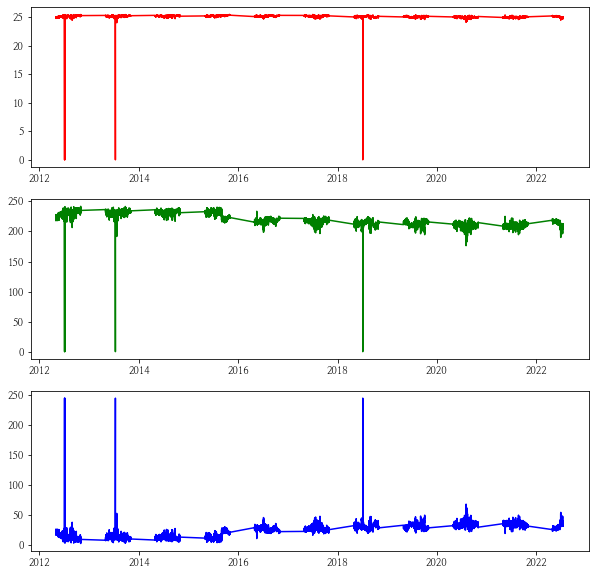

In [48]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(10,10))
ax1.plot(df_swl_swf_ecpc['swl'],'r')
ax2.plot(df_swl_swf_ecpc['sfw'],'g')
ax3.plot(df_swl_swf_ecpc['ecpc'],'b')
plt.show()

## 이상치 처리

### swl(현재수위), sfw(현재저수량), ecpc(공용량)
저수량(sfw) + 공용량(ecpc) = 총저수용량 = 244.0 이므로 
- 현재수위(swl)과 저수량(sfw)만 보간법으로 이상치 변환해주고 
- 공용량(ecpc)는 '244.0-sfw' 값으로 변환하기

In [49]:
# swl, sfw 이상치 -> 결측치로 바꿔주기
dt_range=df['swl'][df['swl']==0].index

for i in range(len(dt_range)):
  df.loc[dt_range[i]]['swl']=np.nan

for i in range(len(dt_range)):
  df.loc[dt_range[i]]['sfw']=np.nan

In [50]:
df[['swl','sfw']].isnull().sum()

swl    83
sfw    83
dtype: int64

In [51]:
# swl, sfw 결측치 -> 보간법으로 채우기
df['swl'].interpolate(method='linear', inplace=True)
df['sfw'].interpolate(method='linear', inplace=True)

In [52]:
df[['swl','sfw']].isnull().sum()

swl    0
sfw    0
dtype: int64

In [53]:
df['swl'][df['swl']==0]

Series([], Name: swl, dtype: float64)

In [54]:
df['sfw'][df['sfw']==0]

Series([], Name: sfw, dtype: float64)

ecpc 이상치: ecpc = 244-sfw로 바꾸기

In [55]:
df['ecpc'][df['ecpc']>240]

ymdhm
2012-07-02 21:00:00    244.00
2012-07-02 22:00:00    244.00
2012-07-02 23:00:00    244.00
2012-07-03 00:00:00    244.00
2012-07-03 01:00:00    244.00
                        ...  
2013-07-12 04:00:00    244.00
2013-07-12 05:00:00    244.00
2013-07-12 06:00:00    244.00
2013-07-12 07:00:00    244.00
2018-07-05 16:40:00    244.01
Name: ecpc, Length: 83, dtype: float64

In [56]:
for i in range(len(dt_range)):
  df.loc[dt_range[i]]['ecpc']=244.0-df.loc[dt_range[i]]['sfw']

In [57]:
df[['ecpc']].isnull().sum()

ecpc    0
dtype: int64

In [58]:
df['ecpc'][df['ecpc']>240] # 이상치 없음

Series([], Name: ecpc, dtype: float64)

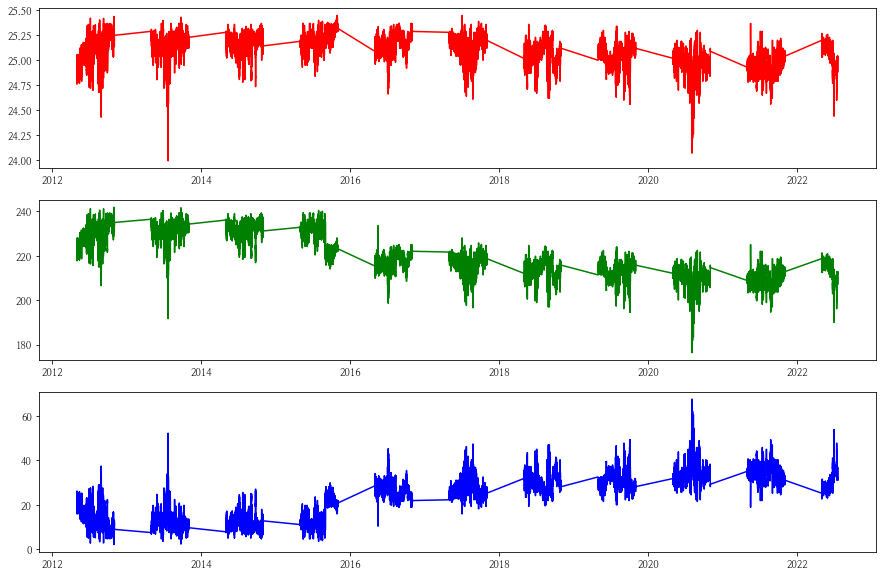

In [59]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(15,10))
ax1.plot(df['swl'],'r')
ax2.plot(df['sfw'],'g')
ax3.plot(df['ecpc'],'b')
plt.show()

### 총방류량(tototf), 유입량(inf) 
- 2013-09-16, 2018-06-08, 2018-07-05 : 두 변수 보간법 등으로 변경해주기
- 2020-08-22 18:50:00 : 방류량0으로 변경해주기
- 2020-08-22 19:00:00 : 방류량0,유입량 bfill로 변경해주기

In [60]:
df_swf_tototf_inf=df[['sfw','tototf','inf']]
df_swf_tototf_inf

,sfw,tototf,inf
ymdhm,,,
2012-05-01 00:00:00,219.07,555.00,555.00
2012-05-01 00:10:00,218.86,562.90,464.60
2012-05-01 00:20:00,218.69,576.40,478.10
2012-05-01 00:30:00,218.69,563.10,464.80
2012-05-01 00:40:00,218.69,576.40,478.10
...,...,...,...
2022-07-18 23:10:00,212.86,259.23,259.23
2022-07-18 23:20:00,212.86,260.46,260.46
2022-07-18 23:30:00,212.86,259.37,259.37


In [61]:
# 저수량변화량 열 추가
df_swf_tototf_inf['sfw_t-1']=df_swf_tototf_inf['sfw'].shift(1)
df_swf_tototf_inf['sfw_change']=df_swf_tototf_inf['sfw']-df_swf_tototf_inf['sfw_t-1']
df_swf_tototf_inf

,sfw,tototf,inf,sfw_t-1,sfw_change
ymdhm,,,,,
2012-05-01 00:00:00,219.07,555.00,555.00,NaN,NaN
2012-05-01 00:10:00,218.86,562.90,464.60,219.07,-0.21
2012-05-01 00:20:00,218.69,576.40,478.10,218.86,-0.17
2012-05-01 00:30:00,218.69,563.10,464.80,218.69,0.00
2012-05-01 00:40:00,218.69,576.40,478.10,218.69,0.00
...,...,...,...,...,...
2022-07-18 23:10:00,212.86,259.23,259.23,212.86,0.00
2022-07-18 23:20:00,212.86,260.46,260.46,212.86,0.00
2022-07-18 23:30:00,212.86,259.37,259.37,212.86,0.00


In [62]:
df_swf_tototf_inf[df_swf_tototf_inf['tototf']<0]

,sfw,tototf,inf,sfw_t-1,sfw_change
ymdhm,,,,,
2013-09-16 04:40:00,236.450,-203.8,-303.8,236.45,0.000
2018-06-08 16:00:00,212.860,-122.0,-21.0,212.86,0.000
2018-07-05 16:40:00,211.775,-990.0,-990.0,212.14,-0.365
2020-08-22 18:50:00,206.010,-404.0,0.0,206.01,0.000
2020-08-22 19:00:00,206.730,-222.0,0.0,206.01,0.720


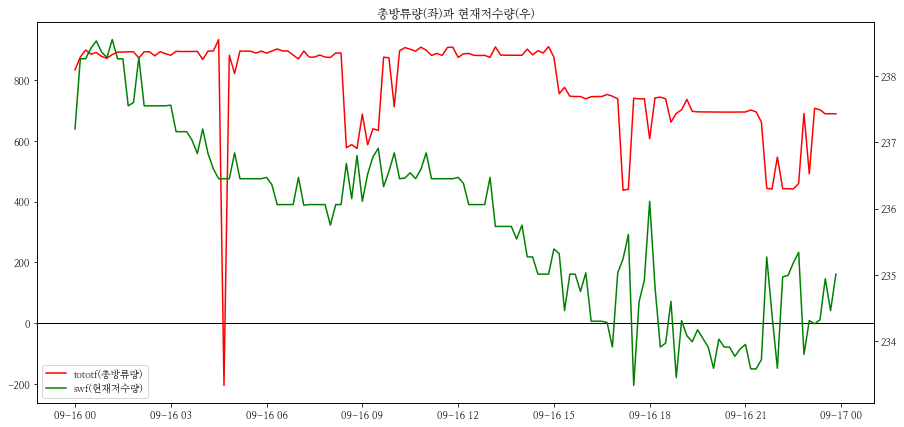

In [63]:
# 2013-09-16 => 총방류량, 유입량 이상치임 => 보간법으로 smooting 해주기
plt.figure(figsize=(15,7))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, =  ax1.plot(df_swf_tototf_inf.loc['2013-09-16']['tototf'], color='red', label="tototf(총방류량)")
b, =  ax2.plot(df_swf_tototf_inf.loc['2013-09-16']['sfw'], color='green', label="swf(현재저수량)")
ax1.axhline(y=0, color='black', linewidth=1)

p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p], loc='lower left')
plt.title('총방류량(좌)과 현재저수량(우)')
plt.show()

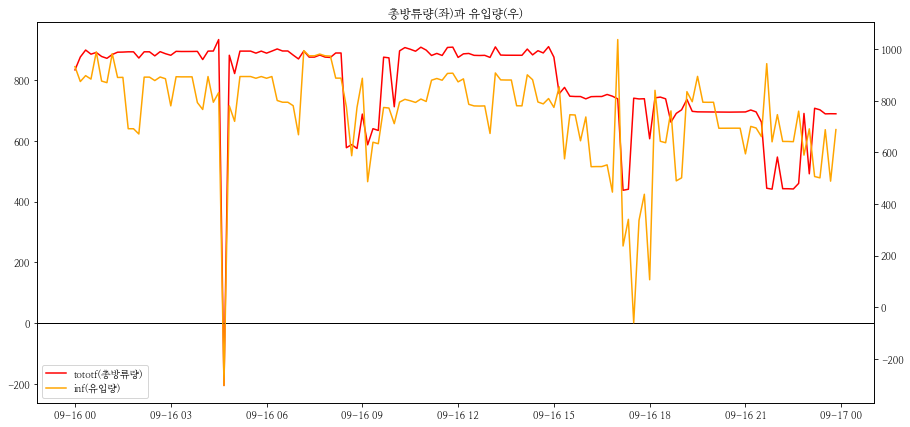

In [64]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, =  ax1.plot(df_swf_tototf_inf.loc['2013-09-16']['tototf'], color='red', label="tototf(총방류량)")
b, =  ax2.plot(df_swf_tototf_inf.loc['2013-09-16']['inf'], color='orange', label="inf(유입량)")
ax1.axhline(y=0, color='black',linewidth=1)

p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p], loc='lower left')
plt.title('총방류량(좌)과 유입량(우)')
plt.show()

2018-06-08 => 총방류량, 유입량 이상치임 => 보간법으로 smooting 해주기

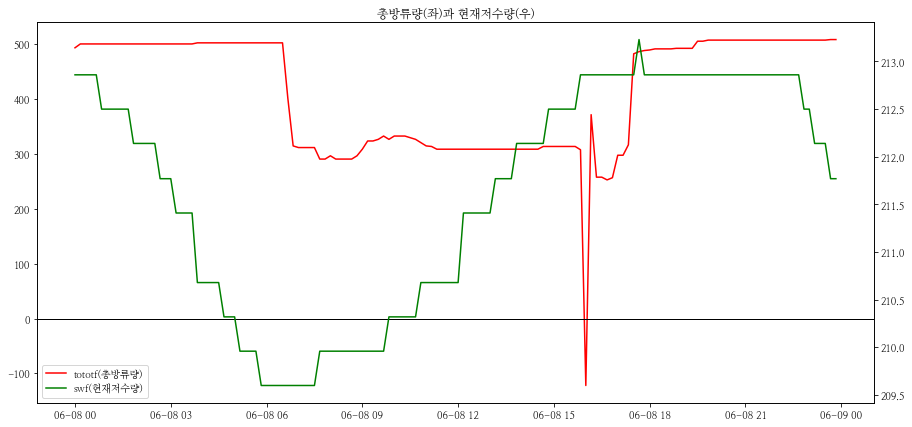

In [154]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, =  ax1.plot(df_swf_tototf_inf.loc['2018-06-08']['tototf'], color='red', label="tototf(총방류량)")
b, =  ax2.plot(df_swf_tototf_inf.loc['2018-06-08']['sfw'], color='green', label="swf(현재저수량)")
ax1.axhline(y=0, color='black', linewidth=1)

p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p], loc='lower left')
plt.title('총방류량(좌)과 현재저수량(우)')
plt.show()

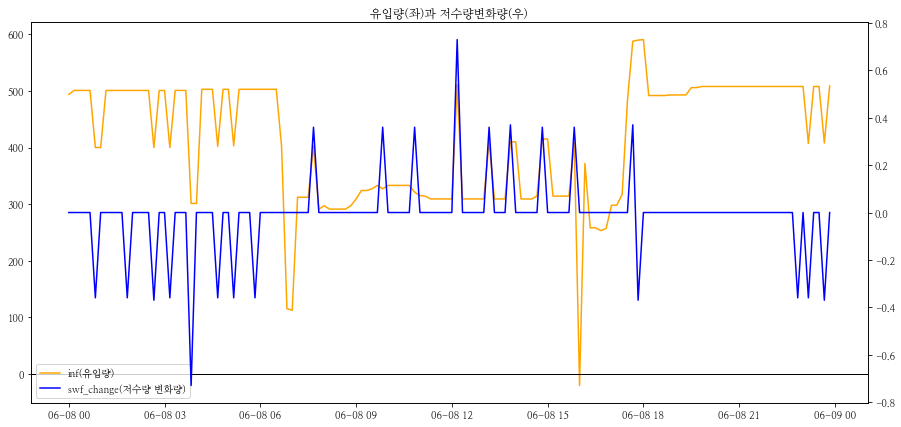

In [155]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
a, =  ax1.plot(df_swf_tototf_inf.loc['2018-06-08']['inf'], color='orange', label="inf(유입량)")
b, =  ax2.plot(df_swf_tototf_inf.loc['2018-06-08']['sfw_change'], color='blue', label="swf_change(저수량 변화량)")
ax1.axhline(y=0, color='black',linewidth=1)

p = [a, b]
ax1.legend(p, [p_.get_label() for p_ in p], loc='lower left')
plt.title('유입량(좌)과 저수량변화량(우)')
plt.show()

In [65]:
# 이상치 -> 결측치로 바꿔주기
dt_list=['2013-09-16 04:40:00', '2018-06-08 16:00:00', '2018-07-05 16:40:00']
for i in range(len(dt_list)):
  df.loc[dt_list[i]]['tototf']=np.nan
  df.loc[dt_list[i]]['inf']=np.nan

In [66]:
print(df[['tototf']].isnull().sum())
print(df[['inf']].isnull().sum())

tototf    3
dtype: int64
inf    3
dtype: int64


In [67]:
df['tototf'].interpolate(method='linear', inplace=True)
df['inf'].interpolate(method='linear', inplace=True)

In [68]:
print(df[['tototf']].isnull().sum())
print(df[['inf']].isnull().sum())

tototf    0
dtype: int64
inf    0
dtype: int64


In [69]:
df.loc['2020-08-22 18:30':'2020-08-22 19:30',['sfw','tototf','inf']]

,sfw,tototf,inf
ymdhm,,,
2020-08-22 18:30:00,206.01,701.0,701.0
2020-08-22 18:40:00,206.01,708.0,708.0
2020-08-22 18:50:00,206.01,-404.0,0.0
2020-08-22 19:00:00,206.73,-222.0,0.0
2020-08-22 19:10:00,207.08,0.0,297.0
2020-08-22 19:20:00,206.73,0.0,198.0
2020-08-22 19:30:00,206.01,0.0,0.0


In [70]:
df.loc['2020-08-22 18:50:00']['tototf']=0.0
df.loc['2020-08-22 19:00:00']['tototf']=0.0
df.loc['2020-08-22 19:00:00']['inf']=df.loc['2020-08-22 19:10:00']['inf']

In [71]:
df.loc['2020-08-22 18:30':'2020-08-22 19:30',['sfw','tototf','inf']]

,sfw,tototf,inf
ymdhm,,,
2020-08-22 18:30:00,206.01,701.0,701.0
2020-08-22 18:40:00,206.01,708.0,708.0
2020-08-22 18:50:00,206.01,0.0,0.0
2020-08-22 19:00:00,206.73,0.0,297.0
2020-08-22 19:10:00,207.08,0.0,297.0
2020-08-22 19:20:00,206.73,0.0,198.0
2020-08-22 19:30:00,206.01,0.0,0.0


In [72]:
df.describe()

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
count,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.0,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000
mean,25.079251,548.548083,219.425047,24.575537,542.037573,345.631700,329.232797,746.826551,316.071760,0.0,312.590404,600.970021,299.979812,1056.807758,0.034074,0.038265,0.035985
std,0.146126,1110.978412,9.912109,9.911699,1104.317316,174.250734,76.559900,1077.388189,67.495669,0.0,63.883452,1376.848129,51.442783,1428.279212,0.338607,0.370553,0.360769
min,23.993000,-807.500000,176.380000,2.150000,0.000000,39.000000,259.700000,243.290000,246.200000,0.0,247.000000,-3522.710000,241.300000,212.040000,0.000000,0.000000,0.000000
25%,24.980000,127.417500,211.770000,14.670000,132.000000,192.000000,287.700000,319.840000,278.200000,0.0,275.000000,205.082500,267.300000,449.120000,0.000000,0.000000,0.000000
50%,25.100000,249.570000,217.630000,26.370000,174.980000,324.000000,307.000000,441.000000,297.200000,0.0,295.000000,355.980000,286.300000,679.420000,0.000000,0.000000,0.000000
75%,25.190000,530.000000,229.330000,32.230000,505.000000,487.000000,342.700000,725.690000,330.200000,0.0,328.000000,709.710000,316.300000,1142.220000,0.000000,0.000000,0.000000
max,25.449000,25991.500000,241.850000,67.620000,25791.500000,842.000000,1287.700000,9405.640000,1146.200000,0.0,1080.000000,25289.170000,843.300000,29854.120000,24.000000,21.000000,24.000000


In [73]:
df

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,288.0,319.84,295.0,0.0,299.0,-456.41,306.0,974.40,0.0,0.0,0.0
2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,287.0,314.01,303.0,0.0,304.0,-717.30,308.0,1006.88,0.0,0.0,0.0
2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,299.0,387.55,307.0,0.0,309.0,-843.37,310.0,1039.90,0.0,0.0,0.0


In [74]:
# fw_1018680는 원래 없는 자료이므로 삭제
df.drop('fw_1018680', axis=1, inplace=True)

In [75]:
df.describe()

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
count,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000
mean,25.079251,548.548083,219.425047,24.575537,542.037573,345.631700,329.232797,746.826551,316.071760,312.590404,600.970021,299.979812,1056.807758,0.034074,0.038265,0.035985
std,0.146126,1110.978412,9.912109,9.911699,1104.317316,174.250734,76.559900,1077.388189,67.495669,63.883452,1376.848129,51.442783,1428.279212,0.338607,0.370553,0.360769
min,23.993000,-807.500000,176.380000,2.150000,0.000000,39.000000,259.700000,243.290000,246.200000,247.000000,-3522.710000,241.300000,212.040000,0.000000,0.000000,0.000000
25%,24.980000,127.417500,211.770000,14.670000,132.000000,192.000000,287.700000,319.840000,278.200000,275.000000,205.082500,267.300000,449.120000,0.000000,0.000000,0.000000
50%,25.100000,249.570000,217.630000,26.370000,174.980000,324.000000,307.000000,441.000000,297.200000,295.000000,355.980000,286.300000,679.420000,0.000000,0.000000,0.000000
75%,25.190000,530.000000,229.330000,32.230000,505.000000,487.000000,342.700000,725.690000,330.200000,328.000000,709.710000,316.300000,1142.220000,0.000000,0.000000,0.000000
max,25.449000,25991.500000,241.850000,67.620000,25791.500000,842.000000,1287.700000,9405.640000,1146.200000,1080.000000,25289.170000,843.300000,29854.120000,24.000000,21.000000,24.000000


100%|██████████| 4/4 [00:11<00:00,  2.99s/it]


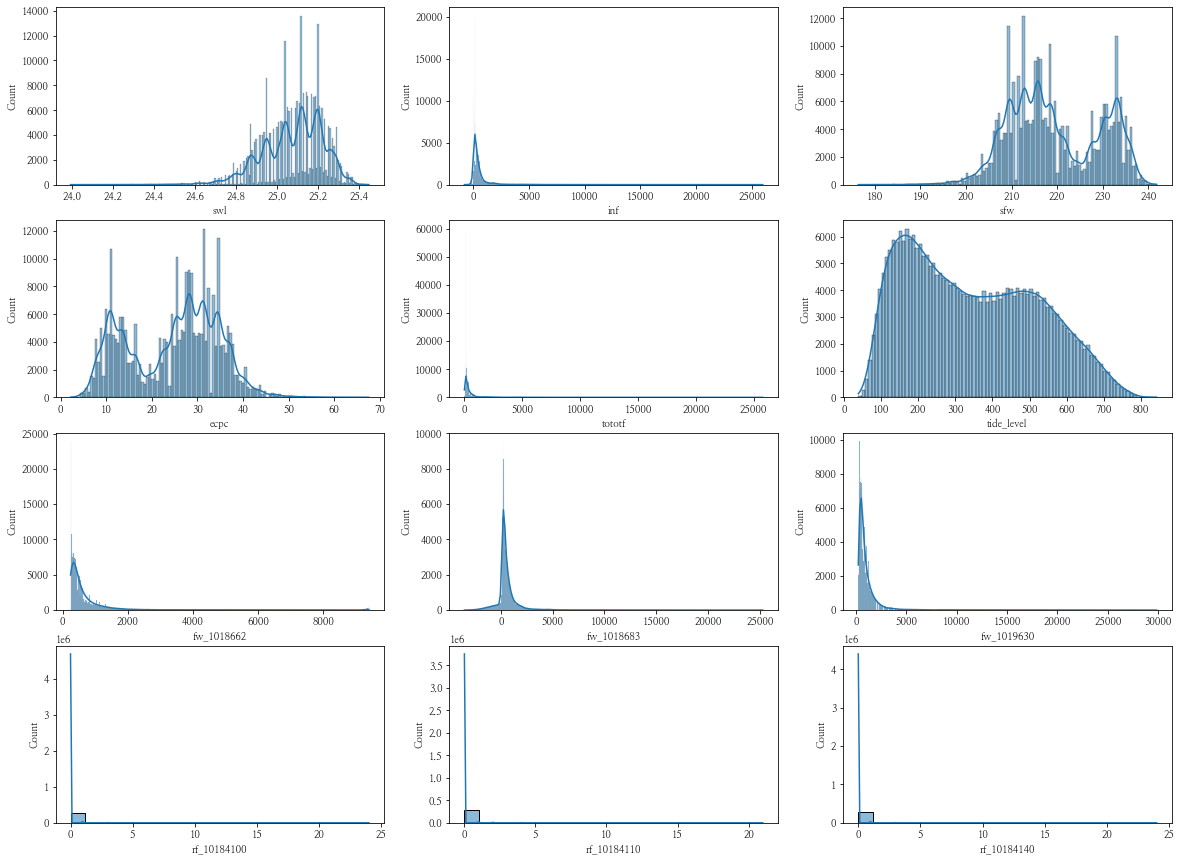

In [260]:
# 원본 data 분포

y_cols=['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']
x_cols=df.drop(y_cols,axis=1).columns

fig,axes=plt.subplots(4,3, figsize=(20,15))
for i in tqdm(range(4)):
  for j in range(3):
    sns.histplot(data=df, x=x_cols[i*3+j], kde=True, ax=axes[i,j])
plt.show()

# 전처리(Scaling)

## Log-Scaling

### Scaling

In [261]:
y_cols=['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']
x_cols=df.drop(y_cols,axis=1).columns

df_log=pd.DataFrame.copy(df)
df_log=df_log.drop(y_cols, axis=1)

# 전체 상용로그변환 (x-min(x)+1) 변환
for i in range(len(x_cols)):
    df_log[x_cols[i]]=np.log10(df_log[x_cols[i]]-min(df_log[x_cols[i]])+1)

100%|██████████| 4/4 [00:09<00:00,  2.47s/it]


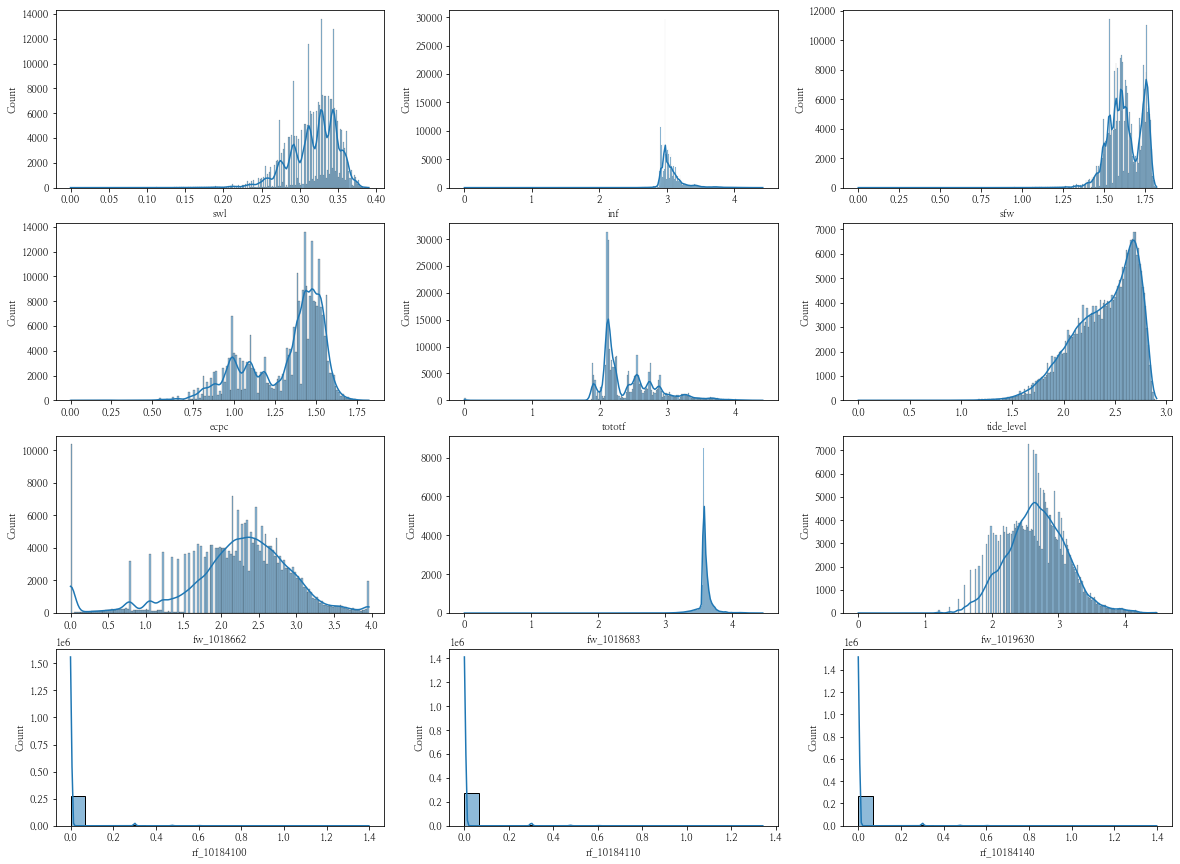

In [262]:
# 변환한 분포 그래프  확인
fig,axes=plt.subplots(4,3, figsize=(20,15))
for i in tqdm(range(4)):
  for j in range(3):
    sns.histplot(data=df_log, x=x_cols[i*3+j], kde=True, ax=axes[i,j])
plt.show()

# 변수 적합성 판단

## Granger causality

In [37]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False, maxlag=5):

    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)

            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [38]:
df_gc=df[y_cols].merge(df_log, on='ymdhm')
df_gc.head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,310.7,300.2,290.0,275.3,0.256958,3.134655,1.640382,1.376212,2.745075,2.609594,2.355566,3.628747,2.517381,0.0,0.0,0.0
2012-05-01 00:10:00,314.7,300.2,290.0,275.3,0.255514,3.104863,1.638290,1.380211,2.751202,2.613842,2.407748,3.628919,2.517381,0.0,0.0,0.0
2012-05-01 00:20:00,313.7,301.2,290.0,275.3,0.254306,3.109444,1.636588,1.383097,2.761477,2.615950,2.395134,3.628402,2.517381,0.0,0.0,0.0
2012-05-01 00:30:00,311.7,301.2,290.0,276.3,0.254306,3.104931,1.636588,1.383097,2.751356,2.617000,2.369067,3.628402,2.532920,0.0,0.0,0.0
2012-05-01 00:40:00,311.7,301.2,291.0,277.3,0.254306,3.109444,1.636588,1.383097,2.761477,2.614897,2.369067,3.626431,2.548082,0.0,0.0,0.0


In [39]:
grangers_causation_matrix(df_gc, variables=df_gc.columns)

,wl_1018662_x,wl_1018680_x,wl_1018683_x,wl_1019630_x,swl_x,inf_x,sfw_x,ecpc_x,tototf_x,tide_level_x,fw_1018662_x,fw_1018683_x,fw_1019630_x,rf_10184100_x,rf_10184110_x,rf_10184140_x
wl_1018662_y,1.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
wl_1018680_y,0.0,1.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
wl_1018683_y,0.0,0.0,1.0,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
wl_1019630_y,0.0,0.0,0.0,1.0000,0.0,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
swl_y,0.0,0.0,0.0,0.0000,1.0,0.0,0.0000,0.0000,0.0,0.1536,0.0000,0.0000,0.0000,0.0291,0.0171,0.0120
inf_y,0.0,0.0,0.0,0.0000,0.0,1.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
sfw_y,0.0,0.0,0.0,0.0036,0.0,0.0,1.0000,0.0000,0.0,0.5105,0.0250,0.0056,0.0015,0.0084,0.0018,0.0000
ecpc_y,0.0,0.0,0.0,0.0022,0.0,0.0,0.0000,1.0000,0.0,0.7850,0.0009,0.0287,0.0007,0.0000,0.0020,0.0001
tototf_y,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0000,1.0,0.0003,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
tide_level_y,0.0,0.0,0.0,0.0000,0.0,0.0,0.2148,0.9054,0.0,1.0000,0.0000,0.0000,0.0000,0.2128,0.0101,0.0802


## 다중공선성(VIF)
- X변수들 간 비교

In [40]:
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i)
                         for i in range(X_train.shape[1])]
    vif['Feature'] = X_train.columns
    return vif

In [41]:
vif=feature_engineering_XbyVIF(df_log)
print(vif)

     VIF_Factor      Feature
0    312.689641          swl
1   1431.420095          inf
2   1168.802655          sfw
3     95.222016         ecpc
4    140.225381       tototf
5     65.448356   tide_level
6     46.018933   fw_1018662
7   1619.445958   fw_1018683
8    191.786899   fw_1019630
9      1.441508  rf_10184100
10     1.466831  rf_10184110
11     1.597302  rf_10184140


In [42]:
vif=feature_engineering_XbyVIF(df_log.drop('inf',axis=1))
print(vif)

     VIF_Factor      Feature
0    312.642865          swl
1   1153.559528          sfw
2     93.192692         ecpc
3     74.878437       tototf
4     64.588002   tide_level
5     45.211044   fw_1018662
6   1181.224681   fw_1018683
7    180.631163   fw_1019630
8      1.441315  rf_10184100
9      1.466396  rf_10184110
10     1.597194  rf_10184140


In [43]:
vif=feature_engineering_XbyVIF(df_log.drop(['inf','sfw'],axis=1))
print(vif)

   VIF_Factor      Feature
0  155.288922          swl
1   52.170467         ecpc
2   71.402666       tototf
3   60.048087   tide_level
4   45.106617   fw_1018662
5  462.069564   fw_1018683
6  179.735972   fw_1019630
7    1.441314  rf_10184100
8    1.466273  rf_10184110
9    1.597139  rf_10184140


In [44]:
vif = feature_engineering_XbyVIF(df_log.drop(['inf', 'sfw', 'fw_1018683'], axis=1))
print(vif)

   VIF_Factor      Feature
0   47.739621          swl
1   29.778153         ecpc
2   52.613550       tototf
3   58.499421   tide_level
4   44.985571   fw_1018662
5  178.029813   fw_1019630
6    1.440984  rf_10184100
7    1.465443  rf_10184110
8    1.596778  rf_10184140


## Train-Test 분리

In [263]:
df_scaled=pd.concat([df_log,df[y_cols]], axis=1)
df_train=df_scaled.loc[:'2022-05']
df_tt=df_scaled.loc['2022':]
df_tt

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,
2022-05-01 00:00:00,0.343802,3.189732,1.636989,1.382377,2.098159,1.633468,1.979321,3.547000,2.415040,0.0,0.0,0.0,290.7,284.2,279.0,269.3
2022-05-01 00:10:00,0.343802,2.969872,1.636989,1.382377,2.098575,1.531479,2.006038,3.564530,2.356580,0.0,0.0,0.0,291.7,284.2,279.0,266.3
2022-05-01 00:20:00,0.343802,2.969742,1.636989,1.382377,2.097604,1.414973,1.979321,3.574717,2.314141,0.0,0.0,0.0,290.7,284.2,279.0,264.3
2022-05-01 00:30:00,0.343802,2.969812,1.636989,1.382377,2.098124,1.301030,1.951143,3.582793,2.291702,0.0,0.0,0.0,289.7,284.2,279.0,263.3
2022-05-01 00:40:00,0.341830,2.907680,1.633266,1.388989,2.098367,1.301030,1.889582,3.587008,2.314141,0.0,0.0,0.0,287.7,284.2,279.0,264.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,0.311118,3.028461,1.573800,1.476976,2.415357,2.673942,1.889582,3.486756,2.882729,0.0,0.0,0.0,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,0.311118,3.028961,1.573800,1.476976,2.417405,2.657056,1.855640,3.448151,2.900826,0.0,0.0,0.0,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,0.311118,3.028518,1.573800,1.476976,2.415591,2.640481,2.162146,3.428190,2.918481,0.0,0.0,0.0,299.0,307.0,309.0,310.0


In [270]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [271]:
#df_train 각 열에 ADF Test 
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "swl" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -15.1588
 No. Lags Chosen       = 87
 Critical value 1%     = -3.43
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "inf" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.3961
 No. Lags Chosen       = 87
 Critical value 1%     = -3.43
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "sfw" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 

## 최적 하이퍼파라미터 p 찾기
- AIC를 제일 작게 하는 p
- step을 20부터 하여 전체적인 p의 범위를 찾고 그 후 step의 값을 작게 하여 최적의 p 값을 찾음

100%|██████████| 8/8 [11:07<00:00, 83.41s/it] 


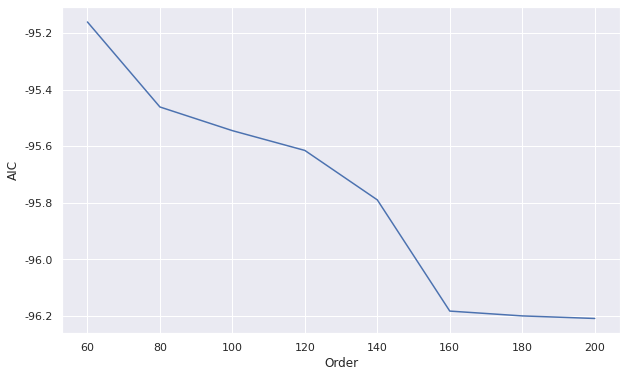

=> 60~200 범위에서 20 간격으로 확인한 결과 : "p=200"에서 AIC 최소


In [46]:
# grid-search - step = 20
r_min=60
r_max=200
step=20

model=VAR(df_train) # 학습데이터
results_aic=[]
for p in tqdm(range(r_min,r_max+1,step)):
  results=model.fit(p)
  results_aic.append(results.aic)

# order p와 AIC 시각화
sns.set()
plt.plot(list(np.arange(r_min,r_max+1,step)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

# AIC를 최소로 만드는 p
min_aic=min(results_aic)
p=r_min+step*results_aic.index(min_aic)
print(f'=> {r_min}~{r_max} 범위에서 {step} 간격으로 확인한 결과 : "p={p}"에서 AIC 최소')

100%|██████████| 21/21 [38:07<00:00, 108.93s/it]


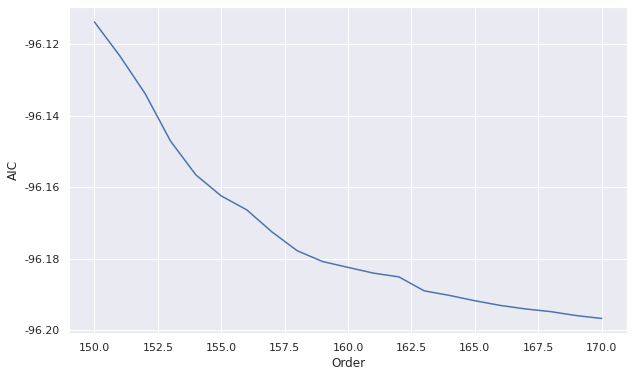

=> 150~170 범위에서 1 간격으로 확인한 결과 : "p=170"에서 AIC 최소


In [47]:
# grid-search - step 10
r_min=150
r_max=170
step=1

model=VAR(df_train) # 학습데이터
results_aic=[]
for p in tqdm(range(r_min,r_max+1,step)):
  results=model.fit(p)
  results_aic.append(results.aic)

# order p와 AIC 시각화
sns.set()
plt.plot(list(np.arange(r_min,r_max+1,step)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

# AIC를 최소로 만드는 p
min_aic=min(results_aic)
p=r_min+step*results_aic.index(min_aic)
print(f'=> {r_min}~{r_max} 범위에서 {step} 간격으로 확인한 결과 : "p={p}"에서 AIC 최소')

=> AIC가 완만해지기 시작하는 158~163 구간을 최적 p로 계산해보기

100%|██████████| 6/6 [19:40<00:00, 196.76s/it]


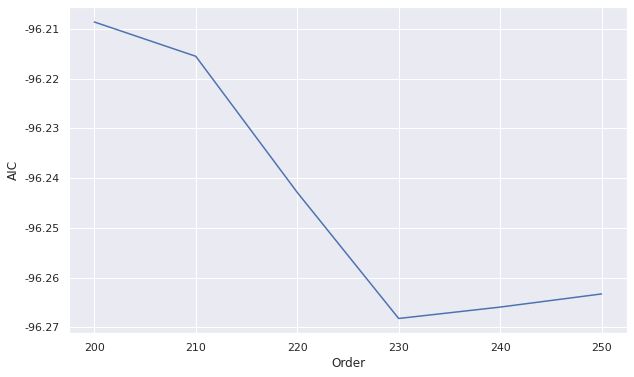

=> 200~250 범위에서 10 간격으로 확인한 결과 : "p=230"에서 AIC 최소


In [48]:
# grid-search - step = 10
r_min=200
r_max=250
step=10

model=VAR(df_train) # 학습데이터
results_aic=[]
for p in tqdm(range(r_min,r_max+1,step)):
  results=model.fit(p)
  results_aic.append(results.aic)

# order p와 AIC 시각화
sns.set()
plt.plot(list(np.arange(r_min,r_max+1,step)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

# AIC를 최소로 만드는 p
min_aic=min(results_aic)
p=r_min+step*results_aic.index(min_aic)
print(f'=> {r_min}~{r_max} 범위에서 {step} 간격으로 확인한 결과 : "p={p}"에서 AIC 최소')

100%|██████████| 11/11 [37:38<00:00, 205.29s/it]


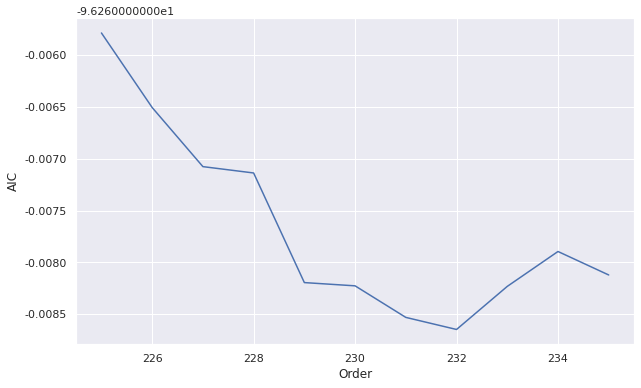

=> 225~235 범위에서 1 간격으로 확인한 결과 : "p=232"에서 AIC 최소


In [8]:
# grid-search - step = 1
r_min=225
r_max=235
step=1

model=VAR(df_train) # 학습데이터
results_aic=[]
for p in tqdm(range(r_min,r_max+1,step)):
  results=model.fit(p)
  results_aic.append(results.aic)

# order p와 AIC 시각화
sns.set()
plt.plot(list(np.arange(r_min,r_max+1,step)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

# AIC를 최소로 만드는 p
min_aic=min(results_aic)
p=r_min+step*results_aic.index(min_aic)
print(f'=> {r_min}~{r_max} 범위에서 {step} 간격으로 확인한 결과 : "p={p}"에서 AIC 최소')

# Model

In [51]:
df_forecast=pd.DataFrame(index=df_tt.index, columns=df_tt.columns)
df_forecast

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,
2022-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-18 23:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-18 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
def get_fc_ys(lag, df_train, df_tt, df_fc):
    # 모델 학습
    lag=lag
    var=VAR(df_train)
    fitted_var=var.fit(lag)
    for i in tqdm(range(6912)):
      # df_tt에서 예측하려는 시간 직전 lag개 데이터 가져오기
      forecast_input=df_tt.iloc[:4464+i,:].values[-lag:] # 4463행(2022-05-31 23:50:00)
      # 바로 다음 step 1개 예측
      fc=fitted_var.forecast(y=forecast_input, steps=1)
      # df_fc에 예측한 wl 결과값 추가하기
      y_cols=['wl_1018662','wl_1018680','wl_1018683','wl_1019630']
      for name in y_cols:
        col_idx=list(df_fc.columns).index(name)
        df_fc.iloc[4464+i,col_idx]=fc[0][col_idx]
    return df_fc

## VAR(232)

In [54]:
df_forecast232=get_fc_ys(232,df_train,df_tt,df_forecast)
df_forecast232=df_forecast232.loc['2022-06':,y_cols]
df_forecast232

100%|██████████| 6912/6912 [00:06<00:00, 1035.11it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.881067,277.357497,274.755918,269.417796
2022-06-01 00:10:00,280.965182,276.09842,273.344968,267.905346
2022-06-01 00:20:00,282.963533,276.668954,273.371601,264.923645
2022-06-01 00:30:00,285.735841,277.498578,273.749826,261.724296
2022-06-01 00:40:00,286.074258,278.092361,273.938219,258.757841
...,...,...,...,...
2022-07-18 23:10:00,288.717848,293.855113,297.631806,306.482227
2022-07-18 23:20:00,290.402725,302.650977,305.30352,307.89898
2022-07-18 23:30:00,295.93029,307.061065,307.808883,310.37599


## inf, sfw 제외 모델

In [55]:
# 필요없는 변수 제거
df_train2=df_train.drop(['inf','sfw'], axis=1)
df_tt2=df_tt.drop(['inf','sfw'], axis=1)
df_forecast2=df_forecast.drop(['inf','sfw'], axis=1)

In [56]:
df_forecast232=get_fc_ys(232,df_train2,df_tt2,df_forecast2)
df_forecast232=df_forecast232.loc['2022-06':,y_cols]
df_forecast232

100%|██████████| 6912/6912 [00:07<00:00, 954.38it/s] 


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.786825,277.4177,274.769228,269.50725
2022-06-01 00:10:00,280.999447,276.208293,273.530506,267.643645
2022-06-01 00:20:00,282.949552,276.616435,273.370686,264.988745
2022-06-01 00:30:00,285.414505,277.475162,273.678069,261.556142
2022-06-01 00:40:00,286.147097,278.020174,273.932783,258.834942
...,...,...,...,...
2022-07-18 23:10:00,288.636036,293.7353,297.690609,306.397955
2022-07-18 23:20:00,290.227495,302.530986,305.091021,308.171015
2022-07-18 23:30:00,295.900694,307.236131,307.898054,310.212295


# 추가 Scaling

## MinMax Scaler

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
X_train = df_log.loc[:'2022-05-31 23:50:00',list(x_cols)]
X_test = df_log.loc['2022-06-01 00:00:00':,list(x_cols)]
Y = df.loc[:,y_cols]
# scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = np.concatenate([X_train_scaled,X_test_scaled])

df_mm = pd.DataFrame(X_scaled,columns=list(x_cols),index=df.index)
df_mm.shape

(276336, 12)

In [20]:
df_scaled=pd.concat([df_mm,df[y_cols]], axis=1)
df_train=df_scaled.loc[:'2022-05']
df_tt=df_scaled.loc['2022':]
df_tt

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,
2022-05-01 00:00:00,0.881029,0.720333,0.898149,0.758454,0.475612,0.562246,0.499569,0.795365,0.540045,0.0,0.0,0.0,290.7,284.2,279.0,269.3
2022-05-01 00:10:00,0.881029,0.670682,0.898149,0.758454,0.475706,0.527141,0.506313,0.799296,0.526972,0.0,0.0,0.0,291.7,284.2,279.0,266.3
2022-05-01 00:20:00,0.881029,0.670653,0.898149,0.758454,0.475486,0.487039,0.499569,0.801580,0.517482,0.0,0.0,0.0,290.7,284.2,279.0,264.3
2022-05-01 00:30:00,0.881029,0.670669,0.898149,0.758454,0.475604,0.447819,0.492457,0.803391,0.512464,0.0,0.0,0.0,289.7,284.2,279.0,263.3
2022-05-01 00:40:00,0.875974,0.656638,0.896106,0.762081,0.475659,0.447819,0.476920,0.804336,0.517482,0.0,0.0,0.0,287.7,284.2,279.0,264.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,0.797271,0.683914,0.863479,0.810356,0.547515,0.920381,0.476920,0.781856,0.644629,0.0,0.0,0.0,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,0.797271,0.684026,0.863479,0.810356,0.547979,0.914569,0.468353,0.773200,0.648675,0.0,0.0,0.0,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,0.797271,0.683926,0.863479,0.810356,0.547568,0.908864,0.545713,0.768724,0.652623,0.0,0.0,0.0,299.0,307.0,309.0,310.0


In [21]:
df_forecast=pd.DataFrame(index=df_tt.index, columns=df_tt.columns)
df_forecast

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,
2022-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-18 23:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-18 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_forecast232=get_fc_ys(232,df_train,df_tt,df_forecast)
df_forecast232=df_forecast232.loc['2022-06':,y_cols]
df_forecast232

100%|██████████| 6912/6912 [00:09<00:00, 742.24it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.881067,277.357497,274.755918,269.417796
2022-06-01 00:10:00,280.965182,276.09842,273.344968,267.905346
2022-06-01 00:20:00,282.963533,276.668954,273.371601,264.923645
2022-06-01 00:30:00,285.735841,277.498578,273.749826,261.724296
2022-06-01 00:40:00,286.074258,278.092361,273.938219,258.757841
...,...,...,...,...
2022-07-18 23:10:00,288.717848,293.855113,297.631806,306.482227
2022-07-18 23:20:00,290.402725,302.650977,305.30352,307.89898
2022-07-18 23:30:00,295.93029,307.061065,307.808883,310.37599


### inf, sfw 변수 제외

In [26]:
df_train2=df_train.drop(['inf','sfw'], axis=1)
df_tt2=df_tt.drop(['inf','sfw'], axis=1)
df_forecast2=df_forecast.drop(['inf','sfw'], axis=1)

In [27]:
df_forecast232_1=get_fc_ys(232,df_train2,df_tt2,df_forecast2)
df_forecast232_1=df_forecast232_1.loc['2022-06':,y_cols]
df_forecast232_1

100%|██████████| 6912/6912 [00:06<00:00, 1047.62it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.786825,277.4177,274.769228,269.50725
2022-06-01 00:10:00,280.999447,276.208293,273.530506,267.643645
2022-06-01 00:20:00,282.949552,276.616435,273.370686,264.988745
2022-06-01 00:30:00,285.414505,277.475162,273.678069,261.556142
2022-06-01 00:40:00,286.147097,278.020174,273.932783,258.834942
...,...,...,...,...
2022-07-18 23:10:00,288.636036,293.7353,297.690609,306.397955
2022-07-18 23:20:00,290.227495,302.530986,305.091021,308.171015
2022-07-18 23:30:00,295.900694,307.236131,307.898054,310.212295


## Standard Scaler

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
X_train = df_log.loc[:'2022-05-31 23:50:00',list(x_cols)]
X_test = df_log.loc['2022-06-01 00:00:00':,list(x_cols)]
Y = df.loc[:,y_cols]
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = np.concatenate([X_train_scaled,X_test_scaled])

df_s = pd.DataFrame(X_scaled,columns=list(x_cols),index=df.index)
df_s.shape

(276336, 12)

In [32]:
df_scaled=pd.concat([df_s,df[y_cols]], axis=1)
df_train=df_scaled.loc[:'2022-05']
df_tt=df_scaled.loc['2022':]
df_tt

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,
2022-05-01 00:00:00,0.798947,0.624999,0.023665,0.298342,-0.765563,-2.502480,-0.313766,-0.467720,-0.583782,-0.128373,-0.134619,-0.129634,290.7,284.2,279.0,269.3
2022-05-01 00:10:00,0.798947,-0.576113,0.023665,0.298342,-0.764612,-2.836381,-0.278241,-0.310953,-0.714150,-0.128373,-0.134619,-0.129634,291.7,284.2,279.0,266.3
2022-05-01 00:20:00,0.798947,-0.576825,0.023665,0.298342,-0.766832,-3.217806,-0.313766,-0.219847,-0.808792,-0.128373,-0.134619,-0.129634,290.7,284.2,279.0,264.3
2022-05-01 00:30:00,0.798947,-0.576444,0.023665,0.298342,-0.765642,-3.590842,-0.351233,-0.147631,-0.858833,-0.128373,-0.134619,-0.129634,289.7,284.2,279.0,263.3
2022-05-01 00:40:00,0.736122,-0.915875,-0.013134,0.327123,-0.765087,-3.590842,-0.433090,-0.109935,-0.808792,-0.128373,-0.134619,-0.129634,287.7,284.2,279.0,264.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,-0.242184,-0.256035,-0.600961,0.710149,-0.039717,0.903898,-0.433090,-1.006476,0.459190,-0.128373,-0.134619,-0.129634,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,-0.242184,-0.253304,-0.600961,0.710149,-0.035031,0.848615,-0.478221,-1.351719,0.499546,-0.128373,-0.134619,-0.129634,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,-0.242184,-0.255724,-0.600961,0.710149,-0.039182,0.794353,-0.070669,-1.530230,0.538919,-0.128373,-0.134619,-0.129634,299.0,307.0,309.0,310.0


In [33]:
df_forecast=pd.DataFrame(index=df_tt.index, columns=df_tt.columns)
df_forecast

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,
2022-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-18 23:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-18 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_forecast232=get_fc_ys(232,df_train,df_tt,df_forecast)
df_forecast232=df_forecast232.loc['2022-06':,y_cols]
df_forecast232

100%|██████████| 6912/6912 [00:09<00:00, 766.17it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.881067,277.357497,274.755918,269.417796
2022-06-01 00:10:00,280.965182,276.09842,273.344968,267.905346
2022-06-01 00:20:00,282.963533,276.668954,273.371601,264.923645
2022-06-01 00:30:00,285.735841,277.498578,273.749826,261.724296
2022-06-01 00:40:00,286.074258,278.092361,273.938219,258.757841
...,...,...,...,...
2022-07-18 23:10:00,288.717848,293.855113,297.631806,306.482227
2022-07-18 23:20:00,290.402725,302.650977,305.30352,307.89898
2022-07-18 23:30:00,295.93029,307.061065,307.808883,310.37599


### inf, sfw 변수 제외

In [36]:
df_train2=df_train.drop(['inf','sfw'], axis=1)
df_tt2=df_tt.drop(['inf','sfw'], axis=1)
df_forecast2=df_forecast.drop(['inf','sfw'], axis=1)

In [37]:
df_forecast232_2=get_fc_ys(232,df_train2,df_tt2,df_forecast2)
df_forecast232_2=df_forecast232_2.loc['2022-06':,y_cols]
df_forecast232_2

100%|██████████| 6912/6912 [00:06<00:00, 1021.20it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.786825,277.4177,274.769228,269.50725
2022-06-01 00:10:00,280.999447,276.208293,273.530506,267.643645
2022-06-01 00:20:00,282.949552,276.616435,273.370686,264.988745
2022-06-01 00:30:00,285.414505,277.475162,273.678069,261.556142
2022-06-01 00:40:00,286.147097,278.020174,273.932783,258.834942
...,...,...,...,...
2022-07-18 23:10:00,288.636036,293.7353,297.690609,306.397955
2022-07-18 23:20:00,290.227495,302.530986,305.091021,308.171015
2022-07-18 23:30:00,295.900694,307.236131,307.898054,310.212295


## Robust Scaler

In [40]:
from sklearn.preprocessing import RobustScaler

In [41]:
X_train = df_log.loc[:'2022-05-31 23:50:00',list(x_cols)]
X_test = df_log.loc['2022-06-01 00:00:00':,list(x_cols)]
Y = df.loc[:,y_cols]
# scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = np.concatenate([X_train_scaled,X_test_scaled])

df_r = pd.DataFrame(X_scaled,columns=list(x_cols),index=df.index)
df_r.shape

(276336, 12)

In [42]:
df_scaled=pd.concat([df_r,df[y_cols]], axis=1)
df_train=df_scaled.loc[:'2022-05']
df_tt=df_scaled.loc['2022':]
df_tt

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,
2022-05-01 00:00:00,0.413493,1.084864,0.045489,-0.036873,-0.254051,-1.770717,-0.420003,-0.762903,-0.431460,0.0,0.0,0.0,290.7,284.2,279.0,269.3
2022-05-01 00:10:00,0.413493,-0.353182,0.045489,-0.036873,-0.253326,-1.990179,-0.386385,-0.441639,-0.530158,0.0,0.0,0.0,291.7,284.2,279.0,266.3
2022-05-01 00:20:00,0.413493,-0.354035,0.045489,-0.036873,-0.255019,-2.240876,-0.420003,-0.254934,-0.601808,0.0,0.0,0.0,290.7,284.2,279.0,264.3
2022-05-01 00:30:00,0.413493,-0.353578,0.045489,-0.036873,-0.254112,-2.486061,-0.455459,-0.106943,-0.639692,0.0,0.0,0.0,289.7,284.2,279.0,263.3
2022-05-01 00:40:00,0.368897,-0.759967,0.023444,-0.018779,-0.253689,-2.486061,-0.532921,-0.029691,-0.601808,0.0,0.0,0.0,287.7,284.2,279.0,264.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,-0.325560,0.030035,-0.328714,0.222025,0.299327,0.468182,-0.532921,-1.866979,0.358142,0.0,0.0,0.0,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,-0.325560,0.033305,-0.328714,0.222025,0.302900,0.431846,-0.575630,-2.574487,0.388694,0.0,0.0,0.0,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,-0.325560,0.030407,-0.328714,0.222025,0.299735,0.396181,-0.189954,-2.940312,0.418501,0.0,0.0,0.0,299.0,307.0,309.0,310.0


In [43]:
df_forecast=pd.DataFrame(index=df_tt.index, columns=df_tt.columns)
df_forecast

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,
2022-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 00:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-18 23:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-18 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_forecast232=get_fc_ys(232,df_train,df_tt,df_forecast)
df_forecast232=df_forecast232.loc['2022-06':,y_cols]
df_forecast232

100%|██████████| 6912/6912 [00:08<00:00, 774.78it/s]


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.881067,277.357497,274.755918,269.417796
2022-06-01 00:10:00,280.965182,276.09842,273.344968,267.905346
2022-06-01 00:20:00,282.963533,276.668954,273.371601,264.923645
2022-06-01 00:30:00,285.735841,277.498578,273.749826,261.724296
2022-06-01 00:40:00,286.074258,278.092361,273.938219,258.757841
...,...,...,...,...
2022-07-18 23:10:00,288.717848,293.855113,297.631806,306.482227
2022-07-18 23:20:00,290.402725,302.650977,305.30352,307.89898
2022-07-18 23:30:00,295.93029,307.061065,307.808883,310.37599


### inf, sfw 변수 제외

In [46]:
df_train2=df_train.drop(['inf','sfw'], axis=1)
df_tt2=df_tt.drop(['inf','sfw'], axis=1)
df_forecast2=df_forecast.drop(['inf','sfw'], axis=1)

In [47]:
df_forecast232_3=get_fc_ys(232,df_train2,df_tt2,df_forecast2)
df_forecast232_3=df_forecast232_3.loc['2022-06':,y_cols]
df_forecast232_3

100%|██████████| 6912/6912 [00:06<00:00, 989.36it/s] 


,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.786825,277.4177,274.769228,269.50725
2022-06-01 00:10:00,280.999447,276.208293,273.530506,267.643645
2022-06-01 00:20:00,282.949552,276.616435,273.370686,264.988745
2022-06-01 00:30:00,285.414505,277.475162,273.678069,261.556142
2022-06-01 00:40:00,286.147097,278.020174,273.932783,258.834942
...,...,...,...,...
2022-07-18 23:10:00,288.636036,293.7353,297.690609,306.397955
2022-07-18 23:20:00,290.227495,302.530986,305.091021,308.171015
2022-07-18 23:30:00,295.900694,307.236131,307.898054,310.212295


# Ensemble

In [15]:
val = (df_forecast232.values+df_forecast232_1.values+df_forecast232_2.values+df_forecast232_3.values)/4

In [16]:
val

array([[279.78682549, 277.41770016, 274.76922806, 269.50724953],
       [280.9994474 , 276.20829309, 273.53050632, 267.64364494],
       [282.94955188, 276.61643539, 273.37068563, 264.98874494],
       ...,
       [295.900694  , 307.23613119, 307.89805401, 310.21229469],
       [310.76331983, 311.73797398, 312.76717206, 311.39686556],
       [321.90566541, 316.31136219, 316.99811645, 312.40998228]])

In [18]:
sub = pd.read_csv('sample_submission.csv',index_col=0)

In [20]:
final_sub = pd.DataFrame(val,index=sub.index,columns=sub.columns)
final_sub

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,279.786825,277.417700,274.769228,269.507250
2022-06-01 00:10,280.999447,276.208293,273.530506,267.643645
2022-06-01 00:20,282.949552,276.616435,273.370686,264.988745
2022-06-01 00:30,285.414505,277.475162,273.678069,261.556142
2022-06-01 00:40,286.147097,278.020174,273.932783,258.834942
...,...,...,...,...
2022-07-18 23:10,288.636036,293.735300,297.690609,306.397955
2022-07-18 23:20,290.227495,302.530986,305.091021,308.171015
2022-07-18 23:30,295.900694,307.236131,307.898054,310.212295


In [21]:
final_sub.to_csv('final_sub.csv')

In [42]:
! pip freeze > requirements.txt